In [1]:
# libs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import torch.utils.data as Data
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from vae import VAE

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
np.random.seed(42)

In [2]:
workers = 12
batch_size = 250   
train_dataset = datasets.ImageFolder(root="/home/ninja/MNIST/training/",
                                     transform=transforms.Compose([transforms.ToTensor(),
                                                                  transforms.Grayscale(num_output_channels=1),]))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

test_dataset = datasets.ImageFolder(root="/home/ninja/MNIST/testing/",
                                    transform=transforms.Compose([transforms.ToTensor(),
                                                                 transforms.Grayscale(num_output_channels=1),]))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

In [3]:
def print_results():
    print(random_errors)
    print(final_errors)
    plt.plot(vae.loss_his)
    plt.show()

def blank_part_of_img(img,random=False):
    blanked_img = img.view(32,1,img_size,img_size).clone()
    blank_size = np.random.randint(2,15)
    if random == True:
        blank_indexes = np.random.randint(0,int(img_size/2),size=2)
    else:
        blank_indexes = np.array([0,0])
    blanked_img[
        :,:,
        blank_indexes[0]:blank_indexes[0]+blank_size,
        blank_indexes[1]:blank_indexes[1]+blank_size
    ] = 0.0
    return blanked_img.view(-1,X_dim)

def combine_tensors(X1,X2):
    X_concat = torch.cat((X1[:8],X2[:8]))
    return X_concat

def show_img(title,img,size = 32):
    print(title)
    img = img[:size].cpu().view(size,1,img_size,img_size)
    npimg = np.transpose(make_grid(img).numpy(),(1,2,0))
    plt.imshow(npimg)

In [4]:
mb_size = batch_size
img_size = 28
Z_dim = 10
X_dim = img_size**2
y_dim = 1
h_dim = int(X_dim/2)

In [5]:
%%time
vae = VAE(X_dim = X_dim,
          h_dim = h_dim,
          Z_dim = Z_dim)
random_errors = vae.evaluate_loader(train_loader)
vae.train(epochs=30,
          loader=train_loader,
          lr=1e-3,
          verbose=1)
final_errors = vae.evaluate_loader(train_loader)
vae.evaluate_loader(test_loader)

Epoch-10| Average loss: 112.76260
Epoch-20| Average loss: 104.01495
Epoch-30| Average loss: 111.94975
CPU times: user 1min 32s, sys: 11.8 s, total: 1min 44s
Wall time: 1min 35s


{'reconstruction_error': 96.71844673156738,
 'kl_divergence': 18.304067182540894}

In [5]:
%%time
vae = VAE(X_dim = X_dim,
          h_dim = h_dim,
          Z_dim = Z_dim)
random_errors = vae.evaluate_loader(train_loader)
vae.train(epochs=30,
          loader=train_loader,
          lr=1e-3,
          verbose=1)
final_errors = vae.evaluate_loader(train_loader)
vae.evaluate_loader(test_loader)

Epoch-10| Average loss: 113.12184
Epoch-20| Average loss: 104.11133
Epoch-30| Average loss: 107.03443
CPU times: user 1min 10s, sys: 10.1 s, total: 1min 20s
Wall time: 1min 30s


{'reconstruction_error': 96.06461486816406,
 'kl_divergence': 16.103542232513426}

{'reconstruction_error': 544.8060162862142, 'kl_divergence': 0.07893528041119377}
{'reconstruction_error': 95.79084348678589, 'kl_divergence': 18.390972463289895}


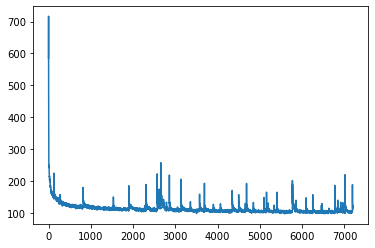

In [6]:
print_results()

{'reconstruction_error': 543.4024843851726, 'kl_divergence': 0.03547080576730271}
{'reconstruction_error': 93.93799571990967, 'kl_divergence': 16.14736053943634}


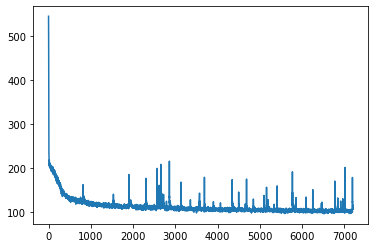

In [6]:
print_results()

In [7]:
for batch_x in test_loader:
    X_real = batch_x[0][:32].view(-1,X_dim).to(device)
    break

In [8]:
X_gen_from_real        = vae.identity(X_real)
X_blank                = blank_part_of_img(X_real,random=True)
X_gen_from_blank       = vae.identity(X_blank)
X_real_plus_blank      = combine_tensors(X_real,X_blank)
X_gen_blank_plus_blank = combine_tensors(X_gen_from_blank,X_blank)
X_real_plus_gen_real   = combine_tensors(X_real,X_gen_from_real)
X_real_plus_gen_blank  = combine_tensors(X_real,X_gen_from_blank)

X_real


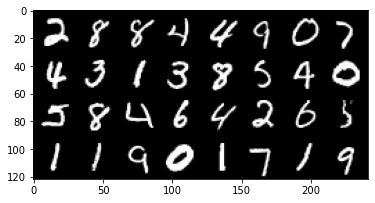

In [9]:
show_img("X_real",X_real)

X_gen_from_real


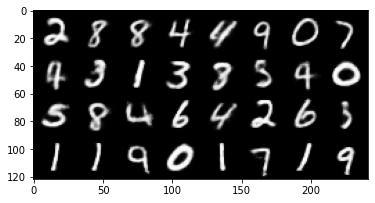

In [10]:
show_img("X_gen_from_real",X_gen_from_real)

X_gen_from_blank


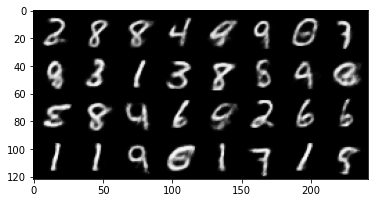

In [11]:
show_img("X_gen_from_blank",X_gen_from_blank,size=32)

X_blank


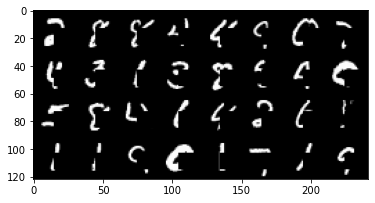

In [12]:
show_img("X_blank",X_blank,size=32)

real


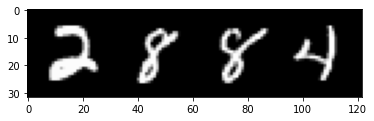

In [13]:
show_img("real",X_real,size=4)

real


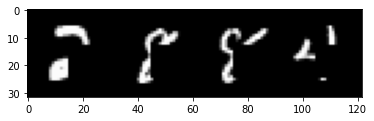

In [14]:
show_img("real",X_blank,size=4)

real


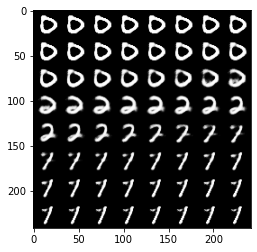

In [31]:
# z_mu, z_var = vae.encoder(X_real[0])
z_mu_new = torch.zeros(64,10)
for i in range(64):
    z_mu_new[i] = z_mu

z_mu_new[:,2] = torch.linspace(-10,10,64)
X_gen = vae.decode(z_mu_new)
show_img("real",X_gen,size=64)

real


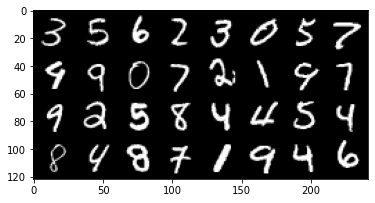

In [31]:
show_img("real",X_real,size=32)

In [32]:
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
%matplotlib inline

In [33]:
def interactive_plot(i):
    plots_dims(data_tc,get_X_from_c_cont(label=i,batch=5000))

In [34]:
interactive_plot_ = interactive(interactive_plot, i=(-50,50,1))
output2 = interactive_plot_.children[0]
output2.layout.width = "500px"
output = interactive_plot_.children[-1]
output.layout.height = '450px'

In [ ]:
interactive_plot_

In [9]:
X_gen_from_real        = vae.identity(X_real)
X_blank                = blank_part_of_img(X_real,random=True)
X_gen_from_blank       = vae.identity(X_blank)
X_real_plus_blank      = combine_tensors(X_real,X_blank)
X_gen_blank_plus_blank = combine_tensors(X_gen_from_blank,X_blank)
X_real_plus_gen_real   = combine_tensors(X_real,X_gen_from_real)
X_real_plus_gen_blank  = combine_tensors(X_real,X_gen_from_blank)

X_real_plus_gen_blank


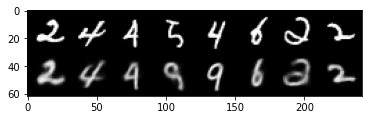

In [10]:
show_img("X_real_plus_gen_blank",X_real_plus_gen_blank,size=16)

X_real_plus_blank


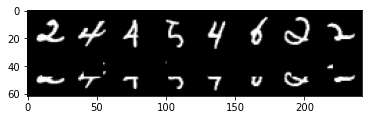

In [11]:
show_img("X_real_plus_blank",X_real_plus_blank,size=16)

X_gen_blank_plus_blank


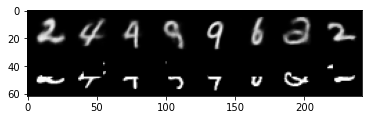

In [12]:
show_img("X_gen_blank_plus_blank",X_gen_blank_plus_blank,size=16)

X_real


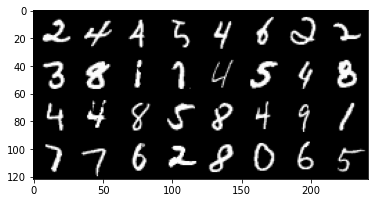

In [13]:
show_img("X_real",X_real,size=32)

X_gen_from_real


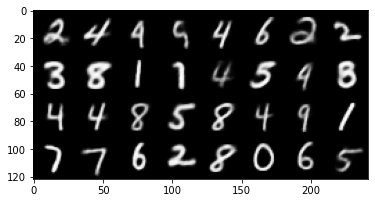

In [14]:
show_img("X_gen_from_real",X_gen_from_real)

X_gen_from_blank


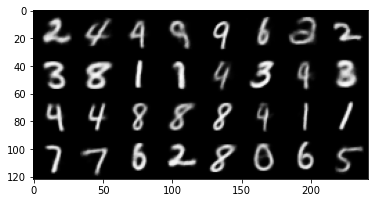

In [15]:
show_img("X_gen_from_blank",X_gen_from_blank,size=32)

real


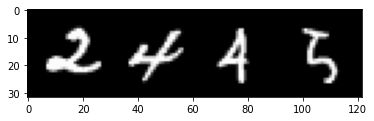

In [17]:
show_img("real",X_real,size=4)

real


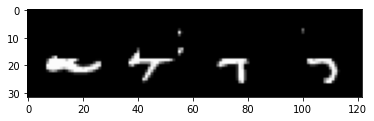

In [18]:
show_img("real",X_blank,size=4)

X_blank


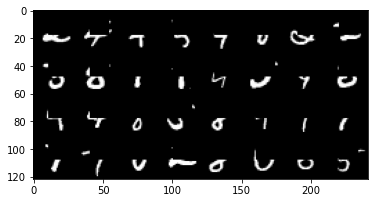

In [16]:
show_img("X_blank",X_blank,size=32)